# Importing Dependencies

In [1]:
'''
The Required basic dependencies are imported for general operations

'''

import pandas as pd    # Pandas library is imported,so that Pandas DataFrame can be used

import numpy as np     # Numpy is library used for Mathematical Operations

import matplotlib.pyplot as plt   # Matplotlib Dependency is used  visualize the required plots 
%matplotlib inline               

# Importing Insurance DataSet

In [2]:
df=pd.read_csv('College_Mess_Data.csv')  # To read the csv file

df.head() # To print frist 5 Datapoints

,Unnamed: 0,Gender,Day,Event_i,Event_d,No_event,Time_Slot,Rating,Number
0,0,male,Monday,yes,no,no,12:30-1:30,34,2209
1,1,male,Monday,yes,no,no,12:30-1:30,39,2309
2,2,male,Monday,yes,no,no,12:30-1:30,36,2252
3,3,male,Monday,yes,no,no,12:30-1:30,38,2283
4,4,male,Monday,yes,no,no,12:30-1:30,39,2302


# Deleting the column which is not required

In [3]:
df.pop('Unnamed: 0')
df

,Gender,Day,Event_i,Event_d,No_event,Time_Slot,Rating,Number
0,male,Monday,yes,no,no,12:30-1:30,34,2209
1,male,Monday,yes,no,no,12:30-1:30,39,2309
2,male,Monday,yes,no,no,12:30-1:30,36,2252
3,male,Monday,yes,no,no,12:30-1:30,38,2283
4,male,Monday,yes,no,no,12:30-1:30,39,2302
...,...,...,...,...,...,...,...,...
983,female,Saturday,no,no,yes,1:30-2:30,12,588
984,female,Saturday,no,no,yes,1:30-2:30,14,613
985,female,Saturday,no,no,yes,1:30-2:30,12,589
986,female,Saturday,no,no,yes,1:30-2:30,12,586


# Checking for null values

In [4]:
df.isnull().sum() # found no null values bacuse it is a created DataSet

Gender       0
Day          0
Event_i      0
Event_d      0
No_event     0
Time_Slot    0
Rating       0
Number       0
dtype: int64

# Getting the Statistical Data

In [5]:
df.describe()

,Rating,Number
count,988.000000,988.000000
mean,38.283401,1302.768219
std,22.077891,651.324695
min,12.000000,496.000000
25%,18.000000,675.750000
50%,36.000000,871.500000
75%,50.000000,1886.500000
max,77.000000,2448.000000


# Label Encoding

In [6]:
# As machine deals with Numericals Characerters are converted into Integers

from sklearn.preprocessing import LabelEncoder
'''
label_encoder=preprocessing.LabelEncoder()


df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Day']=label_encoder.fit_transform(df['Day'])
df['Event_i']=label_encoder.fit_transform(df['Event_i'])
df['Event_d']=label_encoder.fit_transform(df['Event_d'])
df['No_event']=label_encoder.fit_transform(df['No_event'])
df['Time_Slot']=label_encoder.fit_transform(df['Time_Slot'])

df['Gender'].unique()
df['Day'].unique()
df['Event_i'].unique()
df['Event_d'].unique()
df['No_event'].unique()
df['Time_Slot'].unique()

'''

"\nlabel_encoder=preprocessing.LabelEncoder()\n\n\ndf['Gender']=label_encoder.fit_transform(df['Gender'])\ndf['Day']=label_encoder.fit_transform(df['Day'])\ndf['Event_i']=label_encoder.fit_transform(df['Event_i'])\ndf['Event_d']=label_encoder.fit_transform(df['Event_d'])\ndf['No_event']=label_encoder.fit_transform(df['No_event'])\ndf['Time_Slot']=label_encoder.fit_transform(df['Time_Slot'])\n\ndf['Gender'].unique()\ndf['Day'].unique()\ndf['Event_i'].unique()\ndf['Event_d'].unique()\ndf['No_event'].unique()\ndf['Time_Slot'].unique()\n\n"

In [7]:
le_Gender=LabelEncoder()
df['Gender']=le_Gender.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [8]:
le_Day=LabelEncoder()
df['Day']=le_Day.fit_transform(df['Day'])
df['Day'].unique()

array([1, 4, 5, 3, 0, 2])

In [9]:
le_Event_i=LabelEncoder()
df['Event_i']=le_Event_i.fit_transform(df['Event_i'])
df['Event_i'].unique()

array([1, 0])

In [10]:
le_Event_d=LabelEncoder()
df['Event_d']=le_Event_d.fit_transform(df['Event_d'])
df['Event_d'].unique()

array([0, 1])

In [11]:
le_No_event=LabelEncoder()
df['No_event']=le_No_event.fit_transform(df['No_event'])
df['No_event'].unique()

array([0, 1])

In [12]:
le_Time_Slot=LabelEncoder()
df['Time_Slot']=le_Time_Slot.fit_transform(df['Time_Slot'])
df['Time_Slot'].unique()

array([0, 1])

In [13]:
df

,Gender,Day,Event_i,Event_d,No_event,Time_Slot,Rating,Number
0,1,1,1,0,0,0,34,2209
1,1,1,1,0,0,0,39,2309
2,1,1,1,0,0,0,36,2252
3,1,1,1,0,0,0,38,2283
4,1,1,1,0,0,0,39,2302
...,...,...,...,...,...,...,...,...
983,0,2,0,0,1,1,12,588
984,0,2,0,0,1,1,14,613
985,0,2,0,0,1,1,12,589
986,0,2,0,0,1,1,12,586


# Train Test Splitting

In [14]:
from sklearn.model_selection import train_test_split

x=df.drop(columns='Number',axis=1)  # Target Variable Column deleted Dataframe 

y=df['Number']   # Target Variable Dataframe

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state = 2)

# Building Suport Vector Regressor using *linear function*

In [15]:
from sklearn.svm import SVR                        # Importing Support Vector Regressor
from sklearn.pipeline import make_pipeline         # To create A pipeline
from sklearn.preprocessing import StandardScaler   # Used for the Strandardization

regr_linear = make_pipeline(StandardScaler(), SVR(kernel="linear", C=100, gamma="auto"))

# Training the Data to ML model
regr_linear.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, gamma='auto', kernel='linear'))])

In [16]:
# Getting the predictions
Y_pred_linear=regr_linear.predict(X_test)

# Model Evaluation for Linear Kernal

In [17]:
# importing regression metrics

import sklearn.metrics as metrics

# Finding mean_squared_error
mse=metrics.mean_squared_error(Y_test,Y_pred_linear)
print('mean squared error is',mse)

# Finding Root Mean Squared Error
rmse=np.sqrt(mse)
print('Root Mean Squared Error is',rmse)

# Finding R2 Score
r2=metrics.r2_score(Y_test,Y_pred_linear)  # It represents the accuracy
print('R2 Score is',r2)

mean squared error is 21475.20834677878
Root Mean Squared Error is 146.5442197658399
R2 Score is 0.9532566667376563


# Building Suport Vector Regressor using *Robust function*

In [18]:
regr_RBF = make_pipeline(StandardScaler(),SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))

# Training the Data to ML model
regr_RBF.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, gamma=0.1))])

In [19]:
# Getting the Predictions

Y_pred_RBF=regr_RBF.predict(X_test)

# Model Evaluation for Robust Kernal

In [20]:
# importing regression metrics

import sklearn.metrics as metrics

# Finding mean_squared_error
mse=metrics.mean_squared_error(Y_test,Y_pred_RBF)
print('mean squared error is',mse)

# Finding Root Mean Squared Error
rmse=np.sqrt(mse)
print('Root Mean Squared Error is',rmse)

# Finding R2 Score
r2=metrics.r2_score(Y_test,Y_pred_RBF)  # It represents the accuracy
print('R2 Score is',r2)

mean squared error is 4889.713809648315
Root Mean Squared Error is 69.92648861231568
R2 Score is 0.9893569590352236


**By observation we found that SVR using Robust gives good accuracy. Hence it is used to for creating "The Predictor"**

**Standard Table for Rating**

| CASE | RATING (in %)|
|-------|--------|
|No event| 12-15% |80-85%|
|Normal Decrement | 17-23% |74-79%|
|Normal Increment |34-40% |86-91%|
|Special Increment |46-52%|92-97%|
|Special Decrement |72-78%|68-73%|

# Predictor

In [21]:
a=input('Enter the Gender')
b=input('Enter the Day')
c=input('Type YES if it is increment event event else type NO ')
d=input('Type YES if it is decrement event else type NO ')
e=input('Type YES if it is No event else type NO ')
f=input('Enter the TimeSlot')
g=int(input('Based on event and Standard Table, enter the Rating'))

# Changing all the charecters to Numericals as we did before

if a=='Male':
    a=1
else:
    a=0
    

if b=='Monday':
    b=0
elif b=='Tuesday':
    b=1
elif b=='Wednesday':
    b=2
elif b=='Thursday':
    b=3
elif b=='Friday':
    b=4
elif b=='Saturday':
    b=5
    
if c=='YES':
    c=1
else:
    c=0

    
if d=='YES':
    d=1
else:
    d=0
    
if e=='YES':
    e=1
else:
    e=0
    

if f=='12:30-1:30':
    f=0
else:
    f=1
    

    
arr=regr_RBF.predict([[a,b,c,d,e,f,g]])
print('Number of people attending is',int(arr[0]))

Enter the GenderMale
Enter the DayFriday
Type YES if it is increment event event else type NO YES
Type YES if it is decrement event else type NO NO
Type YES if it is No event else type NO NO
Enter the TimeSlot12:30-1:30
Based on event and Standard Table, enter the Rating51
Number of people attending is 2230


c:\users\ganesh\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Plotting Regressor plots

In [22]:
Y_test_New=list(Y_test)
Y_o=[[Y_test_New[i],i ]for i in range(len(Y_test_New))]
Y_o.sort()
Y_test_New.sort()
Y_pred_New1=[]
Y_pred_New2=[]
for i in range(len(Y_pred_RBF)):
    Y_pred_New1.append(Y_pred_RBF[Y_o[i][1]])
for i in range(len(Y_pred_linear)):
    Y_pred_New2.append(Y_pred_linear[Y_o[i][1]])

Text(0.5, 1.0, ' Actual vs Predicted Values for Linear Function')

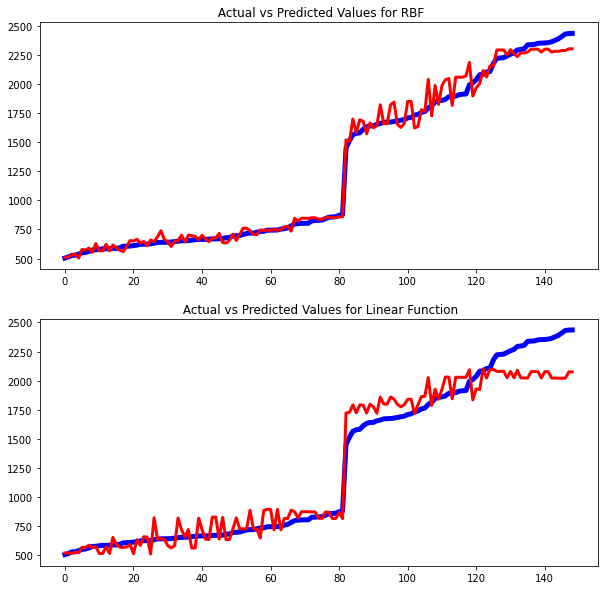

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(Y_test_New,color='blue',linewidth='5')
plt.plot(Y_pred_New1,color='red',linewidth='3')
plt.title(' Actual vs Predicted Values for RBF' )
plt.subplot(2,1,2)
plt.plot(Y_test_New,color='blue',linewidth='5')
plt.plot(Y_pred_New2,color='red',linewidth='3')
plt.title(' Actual vs Predicted Values for Linear Function' )

**Linear function Prediction values deviates more from the Actual Values compared to RBF Prediction values**

# Actual Values vs Predicted values plot

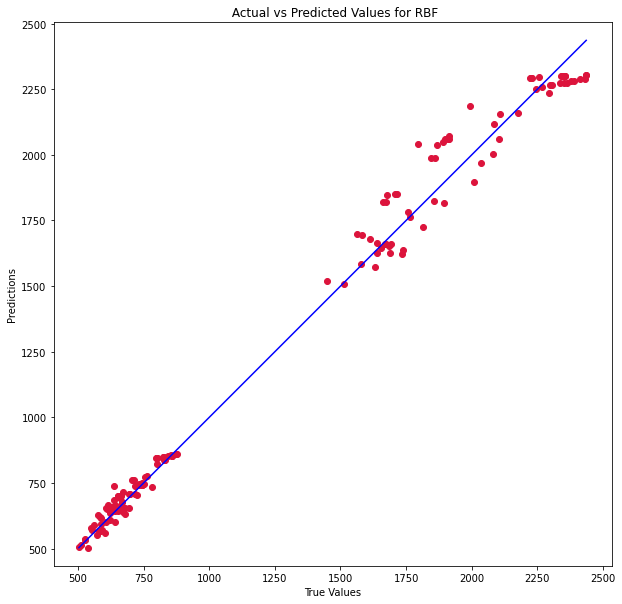

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_pred_RBF,c='crimson')
p1=max(max(Y_pred_RBF),max(Y_test))
p2=min(min(Y_pred_RBF),min(Y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(' Actual vs Predicted Values for RBF' )
plt.axis('equal')
plt.show()


**How close the Prediction values with 'True values' determines 'accuracy'**

In [25]:
import pickle

In [29]:
data={"model":regr_RBF,"le_Gender":le_Gender,"le_Day":le_Day,"le_Event_i":le_Event_i,"le_Event_d":le_Event_d,"le_No_event":le_No_event,"le_Time_Slot":le_Time_Slot}

In [30]:
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)


In [33]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
regre=data['model']
le_Gender=data['le_Gender']
le_Day=data['le_Day']
le_Event_i=data['le_Event_i']
le_Event_d=data['le_Event_d']
le_No_Event=data['le_No_event']
le_Time_Slot=data['le_Time_Slot']

In [34]:
regre.predict([[1,4,1,0,0,0,51]])

c:\users\ganesh\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2230.11660097])